In [17]:
# Python data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tabular data machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.metrics import auc
from sklearn.model_selection import validation_curve

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Preprocess Data

In [4]:
data = pd.read_csv("Treasury Squeeze raw score data.csv").drop(columns=["rowindex"])

In [5]:
data.head()

,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [6]:
# Accucracy improved 2% after encoding contract
def encodingContract(data):
    data['contract_type'] = data['contract'].str[0:2]
    dummies = pd.get_dummies(data["contract_type"])
    
    data = pd.concat([data, dummies], axis = 1).drop(columns=["contract", "contract_type"])
    return data  

In [7]:
X = encodingContract(data.drop(columns=["squeeze"]))
y = data['squeeze']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit KNN Model

In [56]:
from sklearn.neighbors import KNeighborsClassifier
# True and False cases are balanced, so it's reasonable to use accuracy as metrics
# k [1, 40]
depth_range = list(range(1,41))
train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                                             X_train, y_train, param_name="n_neighbors", param_range=depth_range, cv=4)

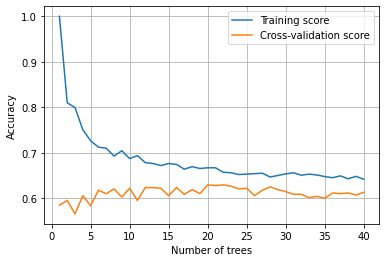

In [57]:
plt.plot(depth_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(depth_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.legend()
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [58]:
np.argmax(test_scores.mean(axis=1))

21

In [59]:
print("K = 21 test accuracy:", round(test_scores[21].mean() * 100, 2),"%")

K = 21 test accuracy: 62.97 %


In reality, we could choose k = 12 or 13 for better time performance.

# Decision Tree 

In [64]:
from sklearn.tree import DecisionTreeClassifier
depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(DecisionTreeClassifier(),
                                           X_train, y_train, param_name="max_depth", param_range=depth_range, cv=3)

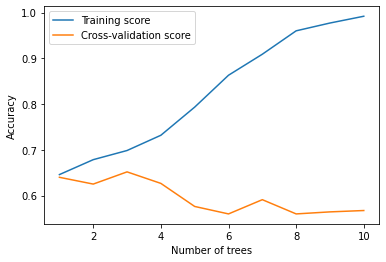

In [65]:
plt.plot(depth_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(depth_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.legend()
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

Max_depth = 3 is the best choice

In [72]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Max_Depth=3 test accuracy:", round(accuracy_score(y_pred, y_test)*100, 2),"%")

Max_Depth=3 test accuracy: 61.78 %


In [67]:
print("My name is {Zhicheng Tang}")
print("My NetID is: {zt17}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Zhicheng Tang}
My NetID is: {zt17}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
